# COVID,SMART
# Group 6

Purpose: This program allows to check safety for the patrons of Lied Library at the Iniversity of Nevada, Las Vegas. It will provide a risk assessment for exposure to COVID-19 for the user, allowing the user to select a time when they can feel a sense of reassurance that the library is safer to come to. Patrons will be able to open this application to check how full the library is, what level of risk is the library currently at for COVID contraction, what time is optimal for visiting, and then decide whether they deem it safe for their visit. The application can take this business problem of whether students and employees feel safe to visit campus and work towards replacing it with a sense of comfort.

* Input: NSHE ID, gender, age, weekday, time
* Processing: validate inputs, categorize historical data into four risk levels for the weekday the user entered, store the cleaned data in a SQL database table, retrieve/update/delete records based on user's confirmation of their attendance
* Output: Graph of the risk levels by four time intervals, each showing a proportion of risk


* Authors: Madina Kamolova, Aragorn Berner, Kevin Ngyuen, Lucas Amorelli, Gilberto Guerique
* Date: 11-30-2020


**Import packages**

Welcome to the Lied Library! 

Thank you for stopping the spread of COVID-19 on the UNLV campus. 


Would you like to check safety at a certain time?
yes
Please provide your NSHE ID
9032638270
Please provide your sex as Female, Male
Male
Please provide your age
19
What day are you coming?
Thursday
What time are you coming?
13


<IPython.core.display.Javascript object>


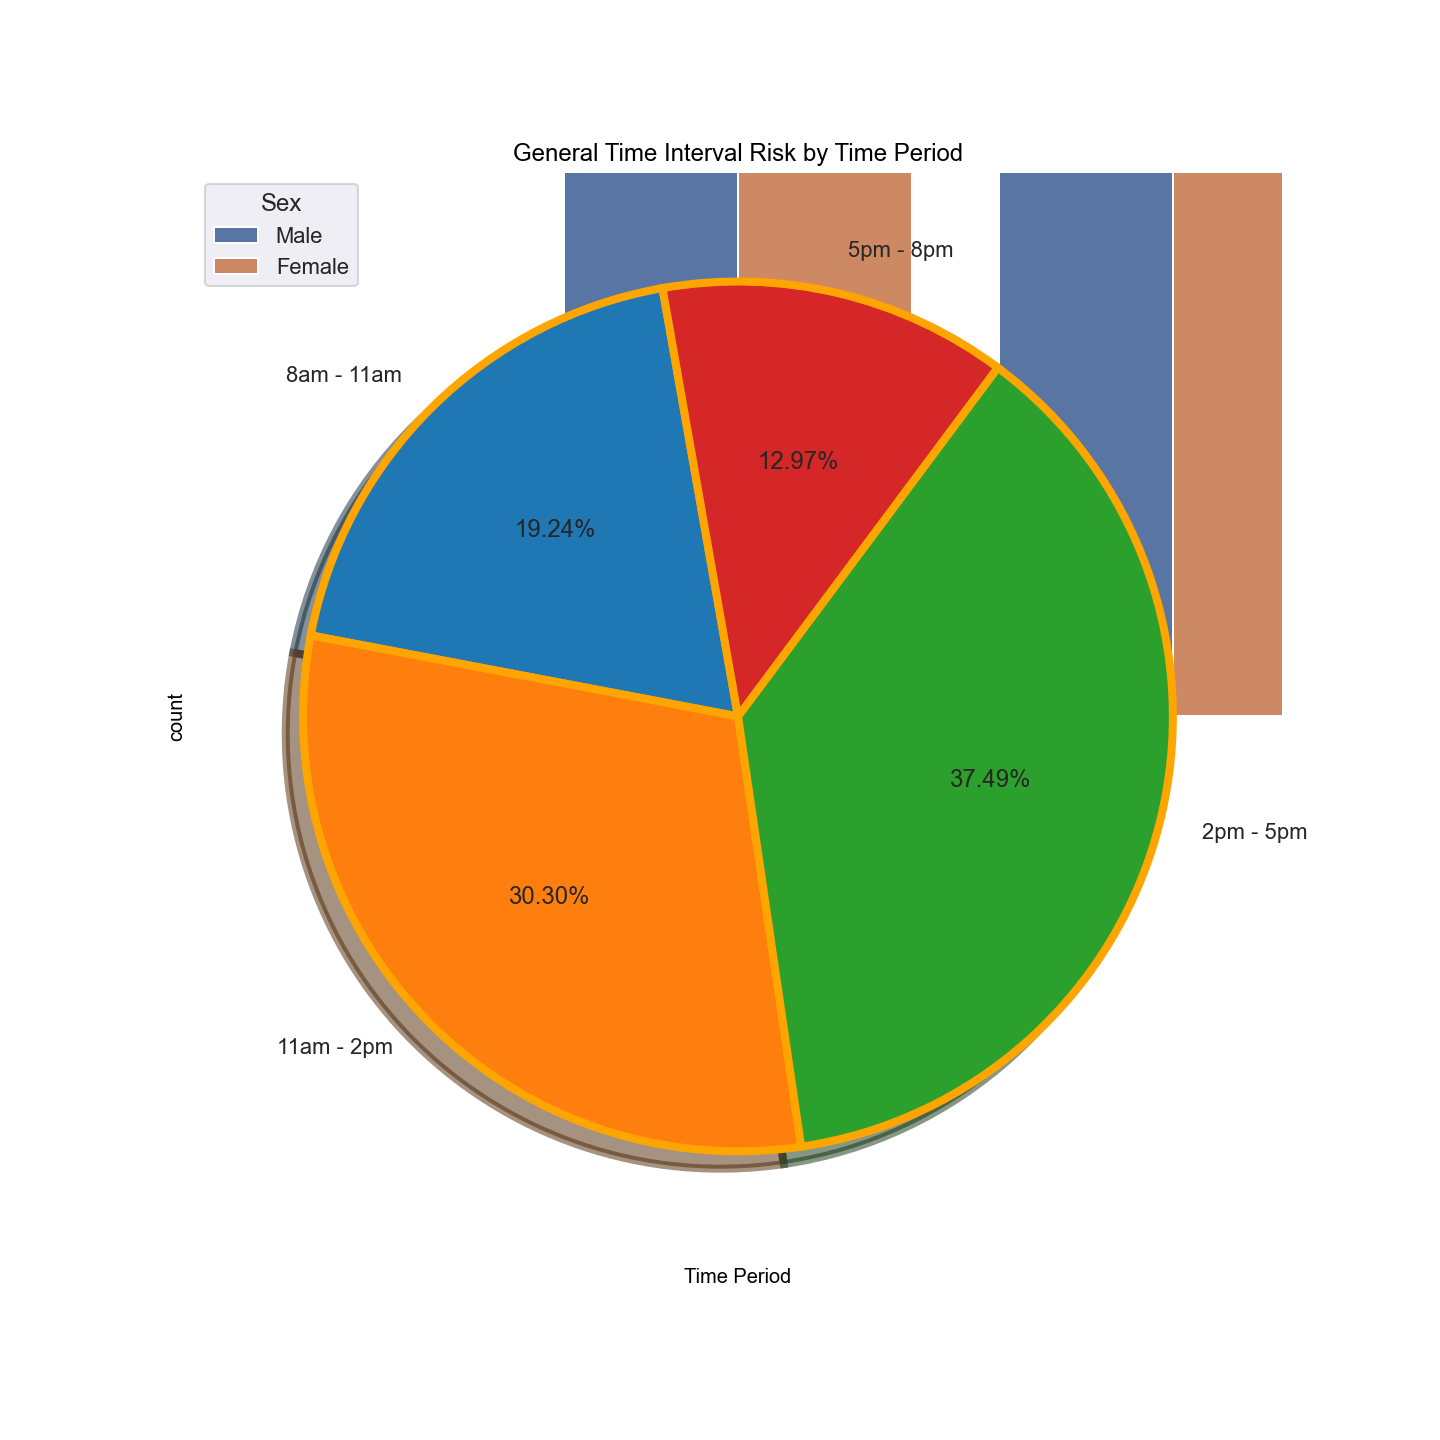

<ipython-input-1-3b98555349d1>:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classA['Time Period'] = '8am-11am'
<ipython-input-1-3b98555349d1>:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classB['Time Period'] = '11am-2pm'
<ipython-input-1-3b98555349d1>:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

	There are about 322 people in the library at this time on Thursday.The Risk Level is 3: High
Are you still coming?
yes
You chose to come at 13o'clock
Would you like to update time?
no
 masks are also mandatory on the UNLV campus, including the Lied Library.
Do you have a mask?
yes
Great!
Thank you for using COVID,SMART.


In [1]:

# Import numpy package as np
import numpy as np
# Import pandas package as pd
import pandas as pd

# pip install mysql-connector-python # do this only if not installed yet
# import mysql connector library
import mysql.connector

# import os so this can be run on any operating system
import os

# import seaborn and matplotlib for plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%matplotlib notebook


  # create a SQL connect object
conn = mysql.connector.connect(
host="localhost", # server
user="root", # user name
passwd="BobBurgers06" #password
        )

#print(conn) #check connection

        # create a cursor
cur = conn.cursor()



#**Input Validation**

# Define a function to validate NSHE ID that the user entered
def validate_NSHE(nshe):
    # It should be all digits
    while not nshe.isnumeric():
        print('The NSHE ID should be a number')
        print('Enter again')
        nshe = input().strip() # get input as a string
    # It should not be negative, and it should be exactly 10 digits in length
    while (int(nshe) <= 0) or (len(nshe) != 10):
        print('NSHE ID should be greater than zero and not more than 10 digits long')
        print('Enter again')
        nshe = input().strip() # get input as a string
    # Convert the input to int
    nshe = int(nshe)
    return nshe

# Define a function to validate sex that the user entered
def validate_sex(sex):
    if sex not in ['Female', 'Male']:
        print('Enter your sex as Female or Male')
        sex = input().strip().capitalize()

# Define a function to validate age that the user entered
def validate_age(age):
    while not age.isnumeric():
        print('The age should be a number')
        print('Enter again')
        age = input().strip() # get input as a string
    while (int(age) <= 0) or (int(age) > 96):
        print('Age should be greater than zero but lower than 96')
        print('Enter again')
        age = input().strip()# get input as a string
    # Convert the input to int
    age = int(age)
    return age

# Define function to validate day of the week when library is open
def validate_day(day):
    isValid = True
    
    # The library is open Mo-Fri but we included all days of the week here
    # so on line 14 we could validate for Saturday and Sunday
    libraryDays = ['Monday', 'Tuesday', 'Wednesday',
                   'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # the day should containt letters only
    if not day.isalpha():
        print('The day should only contain letters')
        isValid = False
    # the day should be the day of the week
    if day.capitalize() not in libraryDays:
        print('The day should be the day of the week')
        isValid = False
    # the library is closed on Saturday
    if dayComing.capitalize() == 'Saturday':
        print('The library is closed on Saturday')
        isValid = False   
    
    return isValid

#in -- to check an element in an array
#in range -- use in for loops to go through each element in an array

# Define function to validate hour whan the user is planning to come
def validate_hour(day):
    # The library is open Mo-Fri but we included all days of the week here
    # so on line 14 we could validate for Saturday and Sunday
    libraryDays = ['Monday', 'Tuesday', 'Wednesday',
                   'Thursday', 'Friday', 'Saturday', 'Sunday']
    libraryHours = np.arange(12)

    # If they are coming on Mo-Thu, library hours are 8:00 - 20:00
    if day in libraryDays[0:4]:
        libraryHours = np.arange(8, 20, 1)
    # If they are coming on Fri, library hours are 8:00 - 18:00
    if day in libraryDays[4]:
        libraryHours = np.arange(8, 18, 1) # they can't come at 18:00, should come earlier    
    # If they are coming on Sun, library hours are 11am – 8pm
    if day in libraryDays[6]:
        libraryHours = np.arange(11, 20, 1)
        
    #print(libraryHours)
        
    return libraryHours

#**Program start**

print('''Welcome to the Lied Library! \n
Thank you for stopping the spread of COVID-19 on the UNLV campus. \n
''')

print('Would you like to check safety at a certain time?')
checkTime = input()

# If the answer is not 'yes' end the program here
if checkTime[0] not in ['y', 'Y']:
    print('Okay, have a good day')
else:
    # If the answer is 'yes' ask them for NSHE ID
    print('Please provide your NSHE ID')
    nsheID = input().strip()

    # Run the function nsheValidated to validate user input
    nsheValidated = validate_NSHE(nsheID) 

    # Get input for sex
    print('Please provide your sex as Female, Male')
    patronSex = input().strip().capitalize()
    # Run function validate_sex
    validate_sex(patronSex)

    # Get input for age
    print('Please provide your age')
    patronAge = input().strip()
    
    # Run function validate_age
    validate_age(patronAge)

    # Get user input for day as string
    print('What day are you coming?')
    dayComing = input().strip().capitalize()
    
    # Validate user entry for day they are coming, and while it is false keep asking for input
    while validate_day(dayComing) == False:
        # prompt input again
        print('Please enter again')
        # get user input again
        dayComing = input().strip().capitalize()

    # Get user input for time as int
    print('What time are you coming?')
    timeComing = int(input())
    
    # validate time for day they are coming
    timeValidated = validate_hour(dayComing)
    #print(timeValidated)
    
    # While time is not within library hours keep asking for input
    # The range for hours during which they can come is last hour-1 (because they can't come when the library closes)
    while timeComing not in timeValidated:
        print('The library hours on ' + dayComing + ' are ' + str(timeValidated[0]) + '-' + str(timeValidated[-1]+1))
        print('And you can come at ' + str(timeValidated[0]) + '-' + str(timeValidated[-1]))
        # prompt input again
        print('Please enter again')
        # get user input again
        timeComing = int(input())

#**Analysis and stats**

    data = pd.read_csv('LatestData.csv') 
    
    data = data.rename(columns={'Gender':'Sex'})
    data.head()

    # panda conversion to datetime so we can work with the dataframe better.
    data['Time In'] = pd.to_datetime(data['Time In'])
    data['Time Out'] = pd.to_datetime(data['Time Out'])
    data['Elapsed Time'] = data['Time Out']- data['Time In']
    data['Elapsed Time'] = pd.to_timedelta(data['Elapsed Time'])

    # Converting each columns to time stamp. For the same purpose to utilized pandas more efficiently
    from datetime import datetime
    newList = []
    for n in data['Time In']:
        newList.append(datetime.timestamp(pd.to_datetime(n)))
    # Just temporary, I need this for calculation. I will remove these columns later. I won't be displaying it.
    data['a'] = newList
    newList2 = []
    for n in data['Time Out']:
        newList2.append(datetime.timestamp(pd.to_datetime(n)))
    data['b'] = newList2

    #Everytime I find a human interaction, I print('Found one'). 
    listofIntervals = []
    for n in range(0,len(data['a'])):
        listofIntervals.append(pd.Interval(data['a'][n],data['b'][n]))
    data['TimeIntervals']= listofIntervals
    totalList=[]
    for n in data['TimeIntervals']:
        total=0
        for i in data['TimeIntervals']:
            if(i.overlaps(n)):
                total=total+1
        totalList.append(total)
    
    data['Total People in Library Per Visit'] = totalList
    data['Day of Week'] = pd.to_datetime(data['Time In']).dt.day_name()

    
    # Create figure and plot space
    fig, ax1 = plt.subplots(figsize=(10, 10))

    # Add x-axis and y-axis
    ax1.scatter(data['Time In'],
            data['Total People in Library Per Visit'],
            color='purple')

    # Set title and labels for axes
    ax1.set(xlabel="Date",
           ylabel="Number of Interactions",
           title="Scatter Plot of Number of Interactions over time")
    plt.show()

    plt.savefig("Scatter_data.png", bbox_inches = "tight", dpi = 200, orientation = "landscape")
    
    # Converting each columns to time stamp. For the same purpose to utilized pandas more efficiently
    from datetime import datetime
    newList = [n for n in data['Time In']]
    # Just temporary, I need this for calculation. I will remove these columns later. I won't be displaying it.
    data['a'] = newList
    newLIst2= [n for n in data['Time Out']]
    data['b'] = newList2

    # Creating our 4 Intervals to get body count for each of those intervals and day of the week later to compare the 4 intervals
    classA=data.loc[((11>data['Time In'].dt.hour) & (data['Time In'].dt.hour>=8)) | ((11>data['Time Out'].dt.hour) & (data['Time Out'].dt.hour>=8))]
    classB=data.loc[((14>data['Time In'].dt.hour) & (data['Time In'].dt.hour>=11)) | ((14>data['Time Out'].dt.hour) & (data['Time Out'].dt.hour>=11))]
    classC=data.loc[((17>data['Time In'].dt.hour) & (data['Time In'].dt.hour>=14)) | ((17>data['Time Out'].dt.hour) & (data['Time Out'].dt.hour>=14))]
    classD=data.loc[((20>data['Time In'].dt.hour) & (data['Time In'].dt.hour>=17)) | ((20>data['Time Out'].dt.hour) & (data['Time Out'].dt.hour>=17))]

    # Naming Interval for classification. 
    classA['Time Period'] = '8am-11am'
    classB['Time Period'] = '11am-2pm'
    classC['Time Period'] = '2pm-5pm'
    classD['Time Period'] = '5pm-8pm'

    # New data set consisting of only classification: Will have duplicated data because of people's present and double recorded
    # Example: 10:30 - 11:30 they crossed both data Intervals and counted as 2 instances purposely. 
    testData=pd.concat([classA,classB,classC,classD])

    # This is the average for the ammount of INTERACTION in the interval. 
    # Interval per person with respect to overlapping PER VISIT. NOT HOW long they will be at the library (duration)
    # Sorting by Time peroid and day of the week wrt to Total people in library 
    groupby = testData.groupby('Time Period')['Total People in Library Per Visit'].mean()
    groupby1 = testData.groupby(['Time Period','Day of Week'])['Total People in Library Per Visit'].mean().sort_values()

    #General Time Interval Risk by Time Period: Visualization for the 4 intervals before splitting by day (M-S) etc
    classMon=testData.loc[(testData['Time In'].dt.day_name() == 'Saturday') & (testData['Time Period']=='5pm-8pm')]
    ax2=sns.barplot(testData['Time Period'], testData['Total People in Library Per Visit'], alpha=0.8, palette=['yellow','red','orange','green'],dodge=False)
    ax2=sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.title("General Time Interval Risk by Time Period")
    plt.xlabel("Time Interval")
    plt.ylabel("Body")
    plt.savefig("General_Interval_Risk.png", bbox_inches = "tight", dpi = 200, orientation = "landscape")

    # Showing overlapping. Exactly same data. 
    # But overlapped twice:  people got double counted on purpose bc of the "or statement" in time period
    # Mathematically "The CONJUNCTION B/T the 2 is verbosed "
    # Note a and b display here but I wil remove them and TimeInverals later. They are for my calculation
    testData.loc[(testData['Time In']==datetime(2020,8,27,9,8,23)) & (testData['Time Out']==datetime(2020,8,27,11,4,12))]
    
    # Distribution: Each general time zone. Also, utilizing their sex of Male or Female who go to the lib during time period
    sns.set()
    weekday_graph = sns.countplot(x = "Time Period", data = testData) 
    weekday_graph = sns.countplot(x = "Time Period", hue = "Sex", data = testData)
    df = testData.drop(['a', 'b', "TimeIntervals", "Time In", "Time Out"], axis = "columns")
    df.rename(columns={'Elapsed Time': 'Duration', 'Time Period':'Time Interval', 'Total People in Library Per Visit': "Body Count"}, inplace=True)
    df = df.drop(df['Day of Week'] == "Saturday")
    plt.savefig("Male_female_w_Interval.png", bbox_inches = "tight", dpi = 200, orientation = "landscape")


    # Got rid of Saturday and 8-11 from dataset 
    notOpen = (df['Day of Week'] == "Saturday") & (df['Time Interval'] == "8am-11am") 
    unwanted = df[notOpen]
    df = df.drop(unwanted.index)

    # Converting hour for computation
    def hourToZone(hour):
        if (hour >=8) and (hour<=11): 
            convertedHour = "8am-11am"
        elif (hour >=11) and (hour<=14):
            convertedHour = "11am-2pm"
        elif (hour>= 14) and (hour <= 17):
            convertedHour = "2pm-5pm"
        elif (hour >= 17) and (hour <= 20):
            convertedHour = "5pm-8pm"
        return convertedHour

    hour = hourToZone(timeComing)
    #print(hour)


    # Computation: get quantile, compare actual count to it and display. 
    def computationalDisplay(day, hour):
        totalPeople = df[df["Day of Week"] == day]

        # Total body count: Divide by 4 because we have 4 weeks worth of data and we are only doing each day general.
        totalBodies = int(totalPeople["Body Count"].sum()/4)
        #print("\n\n\nTotal people in on an average : " + day + " " + str(totalBodies))

        # IQR : q stands for quantile. I personally chosen this interval because the library is nearly half capacity vs
        # Regular time So this makes more sense to reduce quantile in half rather than doing it out of 100 
        # I just divided by 2 for more useful analysis for what we are trying to do. 
        q1 = int(totalBodies * .25/2) 
        q2 = int(totalBodies * .50/2)
        q3 = int(totalBodies * .75/2) 
        q4 = int(totalBodies * .100/2)
        q = [q1,q2,q3,q4]
        #print(q)


        # Body count for that specific zone. 
        zone= df[(df["Day of Week"] == day) & (df["Time Interval"] == hour)]
        count= int(zone["Body Count"].sum()/4)


        #Testing to get accurate time 
        allZone = ["8am-11am", "11am-2pm", "2pm-5pm", "5pm-8pm"]
        risk = []

        for k in allZone:
            Zone1= df[(df["Day of Week"] == day) & (df["Time Interval"] == str(k))]
            count1= Zone1["Body Count"].sum()/4 # body count for interval 1 
            risk.append(count1)
        #print("\n\tThis is the body count for the intervals on monday: " + str(risk))

        if count < q1: 
            print("\tThere are about " + str(count) + " people in the library at this time on " +day+ ". The Risk Level is 1: Low" )
        elif (count >= q1) and (count < q2): 
            print("\tThere are about " + str(count) + " people in the library at this time on " +day+ ". The Risk Level is 2: Medium" )
        elif (count >= q2) and (count < q3): 
            print("\tThere are about " + str(count) + " people in the library at this time on " +day+ ".The Risk Level is 3: High" )
        elif (count >= q3) and (count < q4): 
            print("\tThere are about " + str(count) + " people in the library at this time on " +day+ ".The Risk Level is 4: Peak Hour" )
        else: 
            print("\tGreat risk, the library is super busy relative to pandemic traffic which is not them same as regular school traffic.")

        #print("\n\n\n\tBelow will be a bar graph of the distribution for the day you selected for your information.")
        pieLabels = '8am - 11am', '11am - 2pm', '2pm - 5pm', '5pm - 8pm'
        plt.pie(risk, labels=pieLabels, autopct='%1.2f%%', startangle=100, 
               shadow = True, wedgeprops = {'linewidth' : 4,'edgecolor' : 'orange'})

        plt.savefig("Daily Interval Distribution .png", bbox_inches = "tight", dpi = 200, orientation = "landscape")


    riskLevel = computationalDisplay(dayComing,hour)
    
    # Testing
    test = df[(df['Day of Week'] == "Monday") & (df["Time Interval"] == "5pm-8pm")]
    count = test["Body Count"].sum()
    df["Time_Input"] = df["Body Count"]

    
#Prepare data to insert to SQL

    # Reset index
    df = df.reset_index(drop=True)
    df # check

    # Rename columns so there is no space between words
    df = df.rename(columns ={'NSHE ID':'NSHE_ID','Day of Week':'Weekday'})

    # Create column Id, will use it to build the primary key for SQL table
    df["Id"] = df.index + 1
    df.head() # check

    # Assign only certain columns for SQL
    dfSQL = pd.DataFrame(df, columns= ['NSHE_ID', 'Weekday','Sex', 'Age', 'Id','Time_Input'])
    dfSQL.head() # check

    
# SQL Connection, Create a table (C in CRUD)

    # Create LibraryDB with table Clients
    DB_CREATE_STR = 'CREATE DATABASE IF NOT EXISTS LibraryDB'
    USE_DB_STR='USE LibraryDB'

    TABLE_CLIENTS_STR = 'CREATE TABLE Clients(\
                          Id BIGINT NOT NULL,\
                          NSHE_ID BIGINT(10) NOT NULL,\
                          Weekday VARCHAR(9) NOT NULL,\
                          Sex VARCHAR(6),\
                          Age INT(2),\
                          Time_Input BIGINT (2) NOT NULL,\
                          PRIMARY KEY(NSHE_ID,Weekday,Id))'

    cur.execute(DB_CREATE_STR)
    cur.execute(USE_DB_STR)
    #print('Database LibraryDB created')
    cur.execute('DROP TABLE IF EXISTS Clients')
    cur.execute(TABLE_CLIENTS_STR)
    
    # Add a counter, will tell us how many rows were inserted into Clients table
    count = 0
    # Insert rows
    for row in dfSQL.itertuples():
        count = count+1
        values=( row.Id,
                 row.NSHE_ID,
                 row.Weekday,
                 row.Sex,
                 row.Age,
                 row.Time_Input,
                 )
        sql = "INSERT INTO Clients (Id,NSHE_ID,Weekday,Sex,Age,Time_Input) VALUES (%s,%s,%s,%s,%s,%s)"
        cur.execute(sql, values)
    #print(count)

    # commit
    conn.commit()

# Add user input to each column in SQL table (Create in CRUD)

    # Id needs to increment with new input
    Id = len(df)+1

    # Use LibraryDB to insert user input to the Clients table
    cur.execute('use LibraryDB')
    # Prepare the insert statement
    sql = "INSERT INTO Clients (Id,NSHE_ID,Weekday,Sex,Age,Time_Input) VALUES (%s,%s,%s,%s,%s,%s)"

    # Tuple for the values to be inserted; it hould match the order in the insert statement
    values = (Id, nsheID, dayComing, patronSex, patronAge, timeComing)

    # execute the prepared statement, with values provided.
    cur.execute(sql, values)

    # show a confirmation message to the user
    #print(str(count) + ' row inserted.')

    # commit the changes to the database
    conn.commit()

    # Check in SQL DB, then check here :)
    #print(Id, nsheID, dayComing, patronSex, patronAge, timeComing)

#If the are still coming, the program ends here. If they are not coming, their record is deleted from the database.
#If they are coming and would like to update their info, they can do it.

    # Ask the user if they are still coming
    #print(dayComing)
    print("Are you still coming?")
    patronComing = input().strip()

# READ in CRUD

    # If they are still coming, show them the time they entered by retrieving timeComing from the database
    if patronComing[0] in ['y','Y']:
        
        # Use LibraryDB to insert read input from the Clients table
        cur.execute('use LibraryDB')
        # compose the SQL statement to select the desription and price for the particular product number
        sql = 'SELECT Time_Input FROM Clients WHERE Id = "' + str(Id) +'"'        
        # execute the SQL statement 
        cur.execute(sql)
        for row in cur:
            print('You chose to come at ' + str(row[0]) + 'o\'clock')
        
# UPDATE in CRUD

        # Ask if they would like to update time
        print("Would you like to update time?")
        updateTime = input().strip()

        # If they do want to update time, validate this new time so it is within library hours
        if updateTime[0] in ['y','Y']:
            print("Enter new time")
            timeComing = int(input())
            # validate time for day they are coming
            timeValidated = validate_hour(dayComing)            
            # While time is not within library hours keep asking for input
            # The range for hours during which they can come is last hour-1 (because they can't come when the library closes)
            while timeComing not in timeValidated:
                print('The library hours on ' + dayComing + ' are ' + str(timeValidated[0]) + '-' + str(timeValidated[-1]+1))
                print('And you can come at ' + str(timeValidated[0]) + '-' + str(timeValidated[-1]))
                # prompt input again
                print('Please enter again')
                # get user input again
                timeComing = int(input())
            # Use LibraryDB to update user input for timeComing in the Clients table
            cur.execute('use LibraryDB')
            # compose the SQL statement to update time for a particular Id
            updateSql = "UPDATE Clients SET Time_Input = %s WHERE Id = %s"
            values = (timeComing, Id)
            # execute
            cur.execute(updateSql, values)
            # commit the change to the database
            conn.commit()
            print('Time updated')
            

        # Explain that masks are required on campus
        print("WARNING: Wearing a mask is not only recommended by WHO and CDC to prevent the spread of COVID-19," + "\n" +
                  " masks are also mandatory on the UNLV campus, including the Lied Library.")
        # Ask if the patron has a mask
        print("Do you have a mask?")
        patronMask = input()

        # If they do have a mask, thank them
        if patronMask[0] == 'y':
            print("Great!")
        # Otherwise, share how they can obtain a mask
        else:
            print("You can purchase a mask at UNLV Bookstore")
            print("You can also purchase a mask outside of UNLV or make your own, whichever is more convenient.")
        print("Thank you for using COVID,SMART.")
# DELETE in CRUD

    # If they are not coming, delete their row from the database
    if patronComing[0] not in ['y','Y']:          
        # Use LibraryDB to delete user input from the Clients table
        cur.execute('use LibraryDB')
        # compose the SQL statement to delete row for a particular Id
        deleteSql = "DELETE FROM Clients WHERE Id = %s"
        values = (Id, )
        cur.execute(deleteSql, values)
        # commit the change to the database
        conn.commit()
        print("Your record has been deleted. Stay safe!")
    # close the connection
    conn.close()